# THE MNIST DATASET

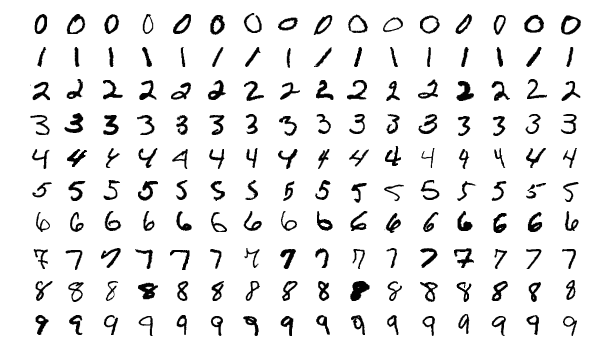

The MNIST dataset is a collection of handwritten digits saved in 28x28 pixel pictures.  
The dataset contains 60000 images for training and 10000 for testing.

In [1]:
from network import Network
import numpy as np
from sklearn import metrics
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
 plt.rcParams["figure.figsize"]=15,10

In [3]:
def show_pics(x, y, n):
    for i in range(n):
        image = x[i].reshape(28, 28, 1)
        label = np.argmax(y[i])
        plt.subplot(2, n, i + 1)
        plt.axis('off')
        plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title(str(label))
    plt.show()

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# convert each 28x28 matrix (picture) to a flat array
x_train = np.reshape(x_train, (x_train.shape[0], 28 * 28))
x_test = np.reshape(x_test, (x_test.shape[0], 28 * 28))

# one hot conversion of the labels used for training
y_train = to_categorical(y_train)

# normalization
x_train = (x_train/255).astype('float32')
x_test = (x_test/255).astype('float32')

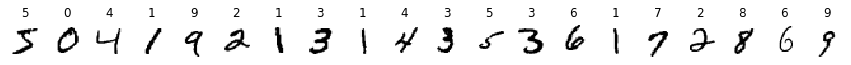

In [5]:
show_pics(x_train, y_train, 20)

In [6]:
net = Network()

In [7]:
net.init(input_dimension=784, loss_function="cross entropy", layers=[
    {"units": 128, "activation": "sigmoid", "type": "dense"},
    {"units": 64,  "activation": "sigmoid", "type": "dense"},
    {"units": 10,  "activation": "softmax", "type": "dense"}
])

In [8]:
net.fit(x_train, y_train)

Epoch 1/10	
1875/1875 [########################################] 100.0% Loss:   0.502572
Epoch 2/10	
1875/1875 [########################################] 100.0% Loss:   0.259735
Epoch 3/10	
1875/1875 [########################################] 100.0% Loss:   0.196558
Epoch 4/10	
1875/1875 [########################################] 100.0% Loss:   0.169836
Epoch 5/10	
1875/1875 [########################################] 100.0% Loss:   0.147114
Epoch 6/10	
1875/1875 [########################################] 100.0% Loss:   0.127756
Epoch 7/10	
1875/1875 [########################################] 100.0% Loss:   0.108622
Epoch 8/10	
1875/1875 [########################################] 100.0% Loss:   0.110155
Epoch 9/10	
1875/1875 [########################################] 100.0% Loss:   0.098403
Epoch 10/10	
1875/1875 [########################################] 100.0% Loss:   0.080717


In [9]:
y_pred = net.predict(x_test)

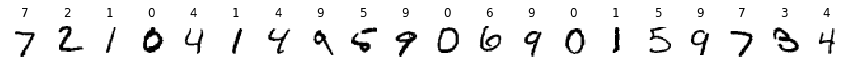

In [10]:
# first 20 predictions
show_pics(x_test, y_pred, 20)

In [11]:
# create arrays with the wrong classified images
errors_x = x_test[np.argmax(y_pred, axis=1) != y_test]
errors_y = y_pred[np.argmax(y_pred, axis=1) != y_test]
real_y = y_test[np.argmax(y_pred, axis=1) != y_test]

PREDICTIONS:


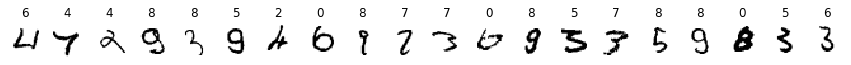

REAL LABELS:


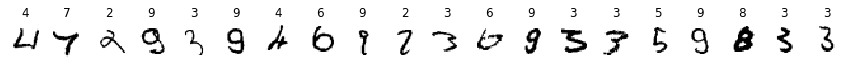

In [12]:
# plot some of the errors and their real label
print("PREDICTIONS:")
show_pics(errors_x, errors_y, 20)
print("REAL LABELS:")
show_pics(errors_x, to_categorical(real_y), 20)

In [13]:
# undo one hot encoding of the prediction
y_pred = np.argmax(y_pred, axis=1)

<AxesSubplot:>

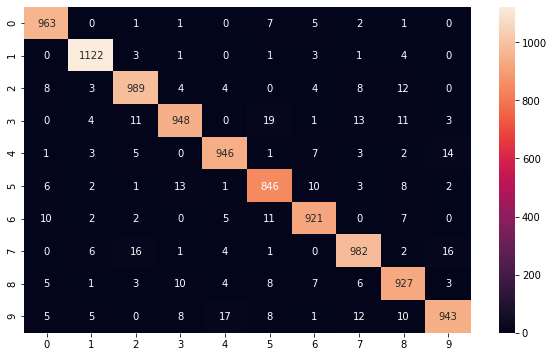

In [14]:
cmatrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 6))
sns.heatmap(cmatrix, annot=True, fmt="d")

In [15]:
print(f"Accuracy score: {metrics.accuracy_score(y_test, y_pred):10.5}")

Accuracy score:     0.9587
